<a href="https://colab.research.google.com/github/tanishayadav16/DL_exp3/blob/main/exp%2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0851 - val_loss: 0.0635
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0584 - val_loss: 0.0327
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0321 - val_loss: 0.0450
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0381 - val_loss: 0.0358
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0330 - val_loss: 0.0325
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0336 - val_loss: 0.0327
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0365 - val_loss: 0.0325
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0360 - val_loss: 0.0326
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0339 - val_loss: 0.0322
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0334 - val_loss: 0.0320
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0331 - val_loss: 0.0319
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0334 - val_loss: 0.0321
Epoch 13/20

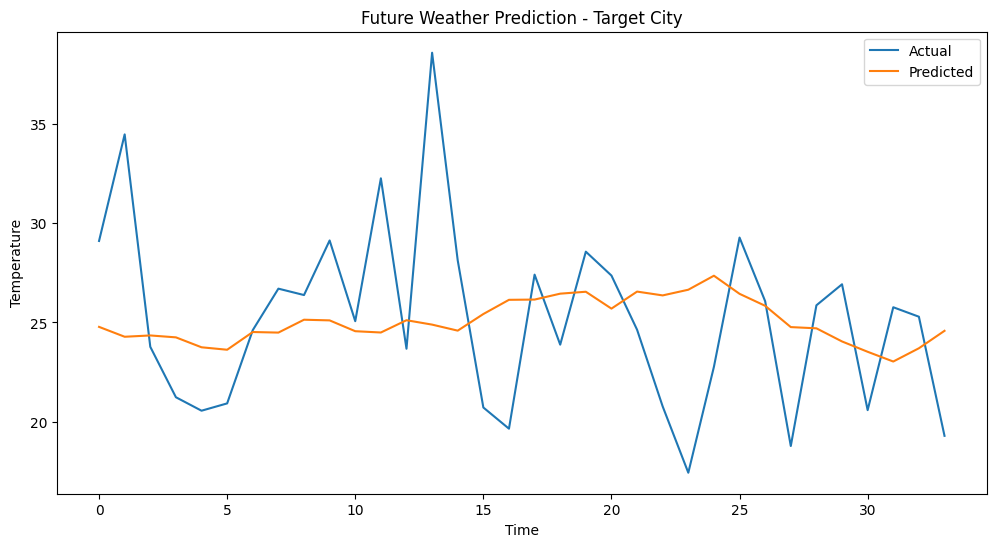

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv('multi_city_weather.csv')  # Example dataset

# Convert 'Date' to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Set date as index
df.set_index('Date', inplace=True)

# Select only numerical features (multi-city weather data)
features = df.dropna().values

# Normalize features
scaler = MinMaxScaler()
scaled = scaler.fit_transform(features)

# Create sequences
def create_sequences(data, target_column_index, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, target_column_index])
    return np.array(X), np.array(y)

# Example: Predict 'Temperature_CityX' which is at column index 0
target_column_index = 0
seq_len = 30
X, y = create_sequences(scaled, target_column_index, seq_len)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(seq_len, X.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict and visualize
predicted = model.predict(X_test)
predicted_rescaled = scaler.inverse_transform(
    np.hstack((predicted, np.zeros((len(predicted), scaled.shape[1]-1))))
)[:, target_column_index]

actual_rescaled = scaler.inverse_transform(
    np.hstack((y_test.reshape(-1, 1), np.zeros((len(y_test), scaled.shape[1]-1))))
)[:, target_column_index]

plt.figure(figsize=(12, 6))
plt.plot(actual_rescaled, label='Actual')
plt.plot(predicted_rescaled, label='Predicted')
plt.title("Future Weather Prediction - Target City")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()
